In [1]:
#Importando as bibliotecas 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#importando o dataset
dataf = pd.read_csv('agricultural_raw_material.csv')

In [ ]:
#Informação do dataset
dataf.info

In [ ]:
#Verificando os valores nulos
dataf.isnull().sum()

In [3]:
#Apagando os valores nulos.
dataf= dataf.dropna()

In [ ]:
dataf.isnull().sum()

In [4]:
#lidando com valores ausentes, incorretos ou invalidos.
dataf = dataf.replace('%', '', regex=True)
dataf = dataf.replace(',', '', regex=True)
dataf = dataf.replace('-', '', regex=True)
dataf = dataf.replace('', np.nan)
dataf = dataf.replace('MAY90', np.nan)

In [ ]:
#Verificando o tipo de dados das columnas do dataset.
dataf.dtypes

In [5]:
#Convertendo o tipo de dados das columnas do dataset.
#criar uma lista das columnas a converter.
lsta = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", 'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change','Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood Price','Soft sawnwood price % Change', 'Wood pulp price % Change']
#Convertendo a minha lista para o tipo "Float".
dataf[lsta] = dataf[lsta].astype('float')

In [22]:
dataf.dtypes

Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64
dtype: object

In [ ]:
dataf.head()

In [6]:
#convertendo o tipo de dados da columna "Month" para tipo data.
dataf.Month = pd.to_datetime(dataf.Month.str.upper(), format ='%b%y', yearfirst =False)
dataf = dataf.set_index('Month')

In [ ]:
dataf.head()

In [7]:
#Configurando os parametros padroes dos graficos.
%matplotlib inline 
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
#Análise Exploratória e Visualização dos dados.

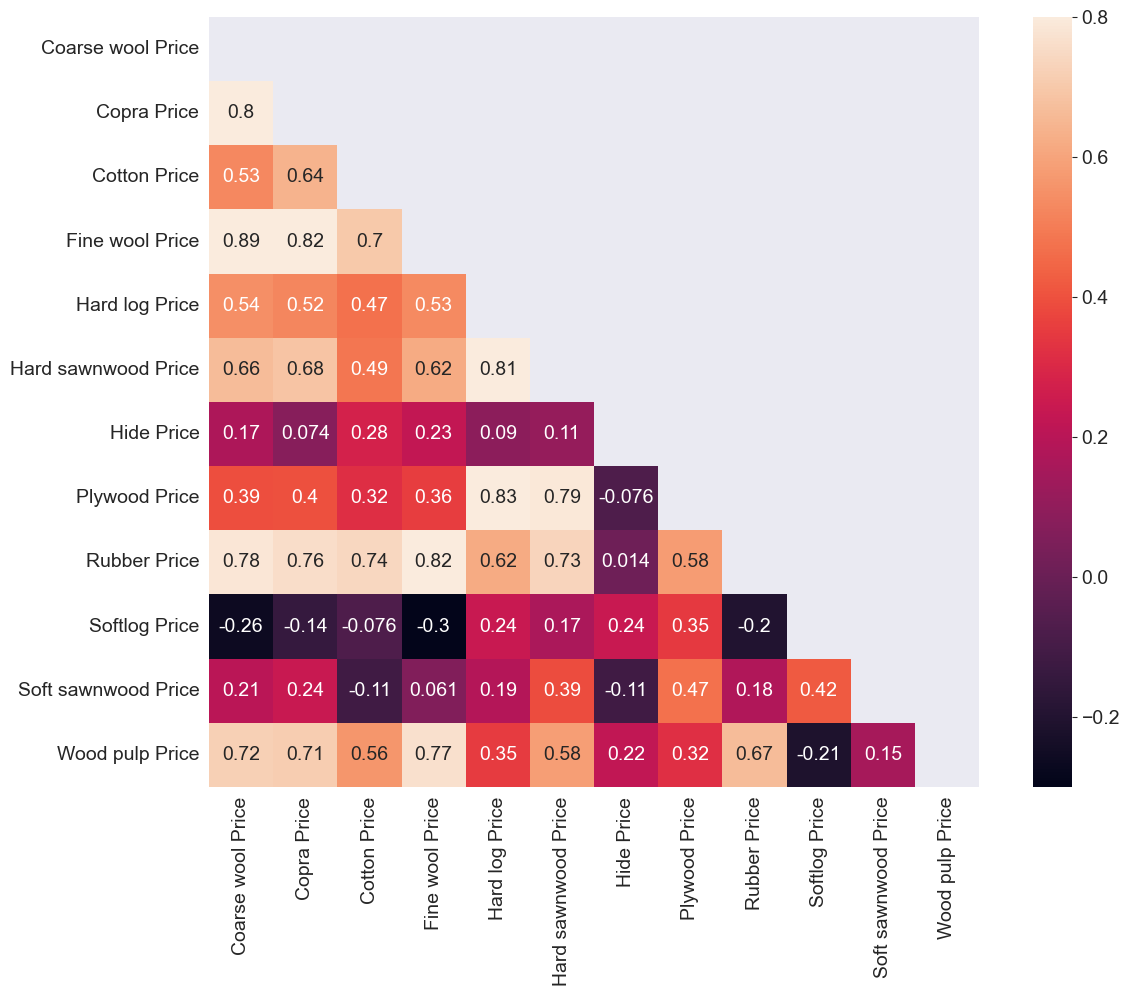

In [8]:
#Pasando os dados para criar o primeiro grafico.
#Criando uma lista com as columnas a ser projetadas no grafico
colum_preço =['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
#Optendo a matriz de correlação
corrmat = dataf[colum_preço].corr()
#Tamanho do nosso grafico
fig = plt.figure(figsize = (14, 10))
#Grafico de correlação por preço
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

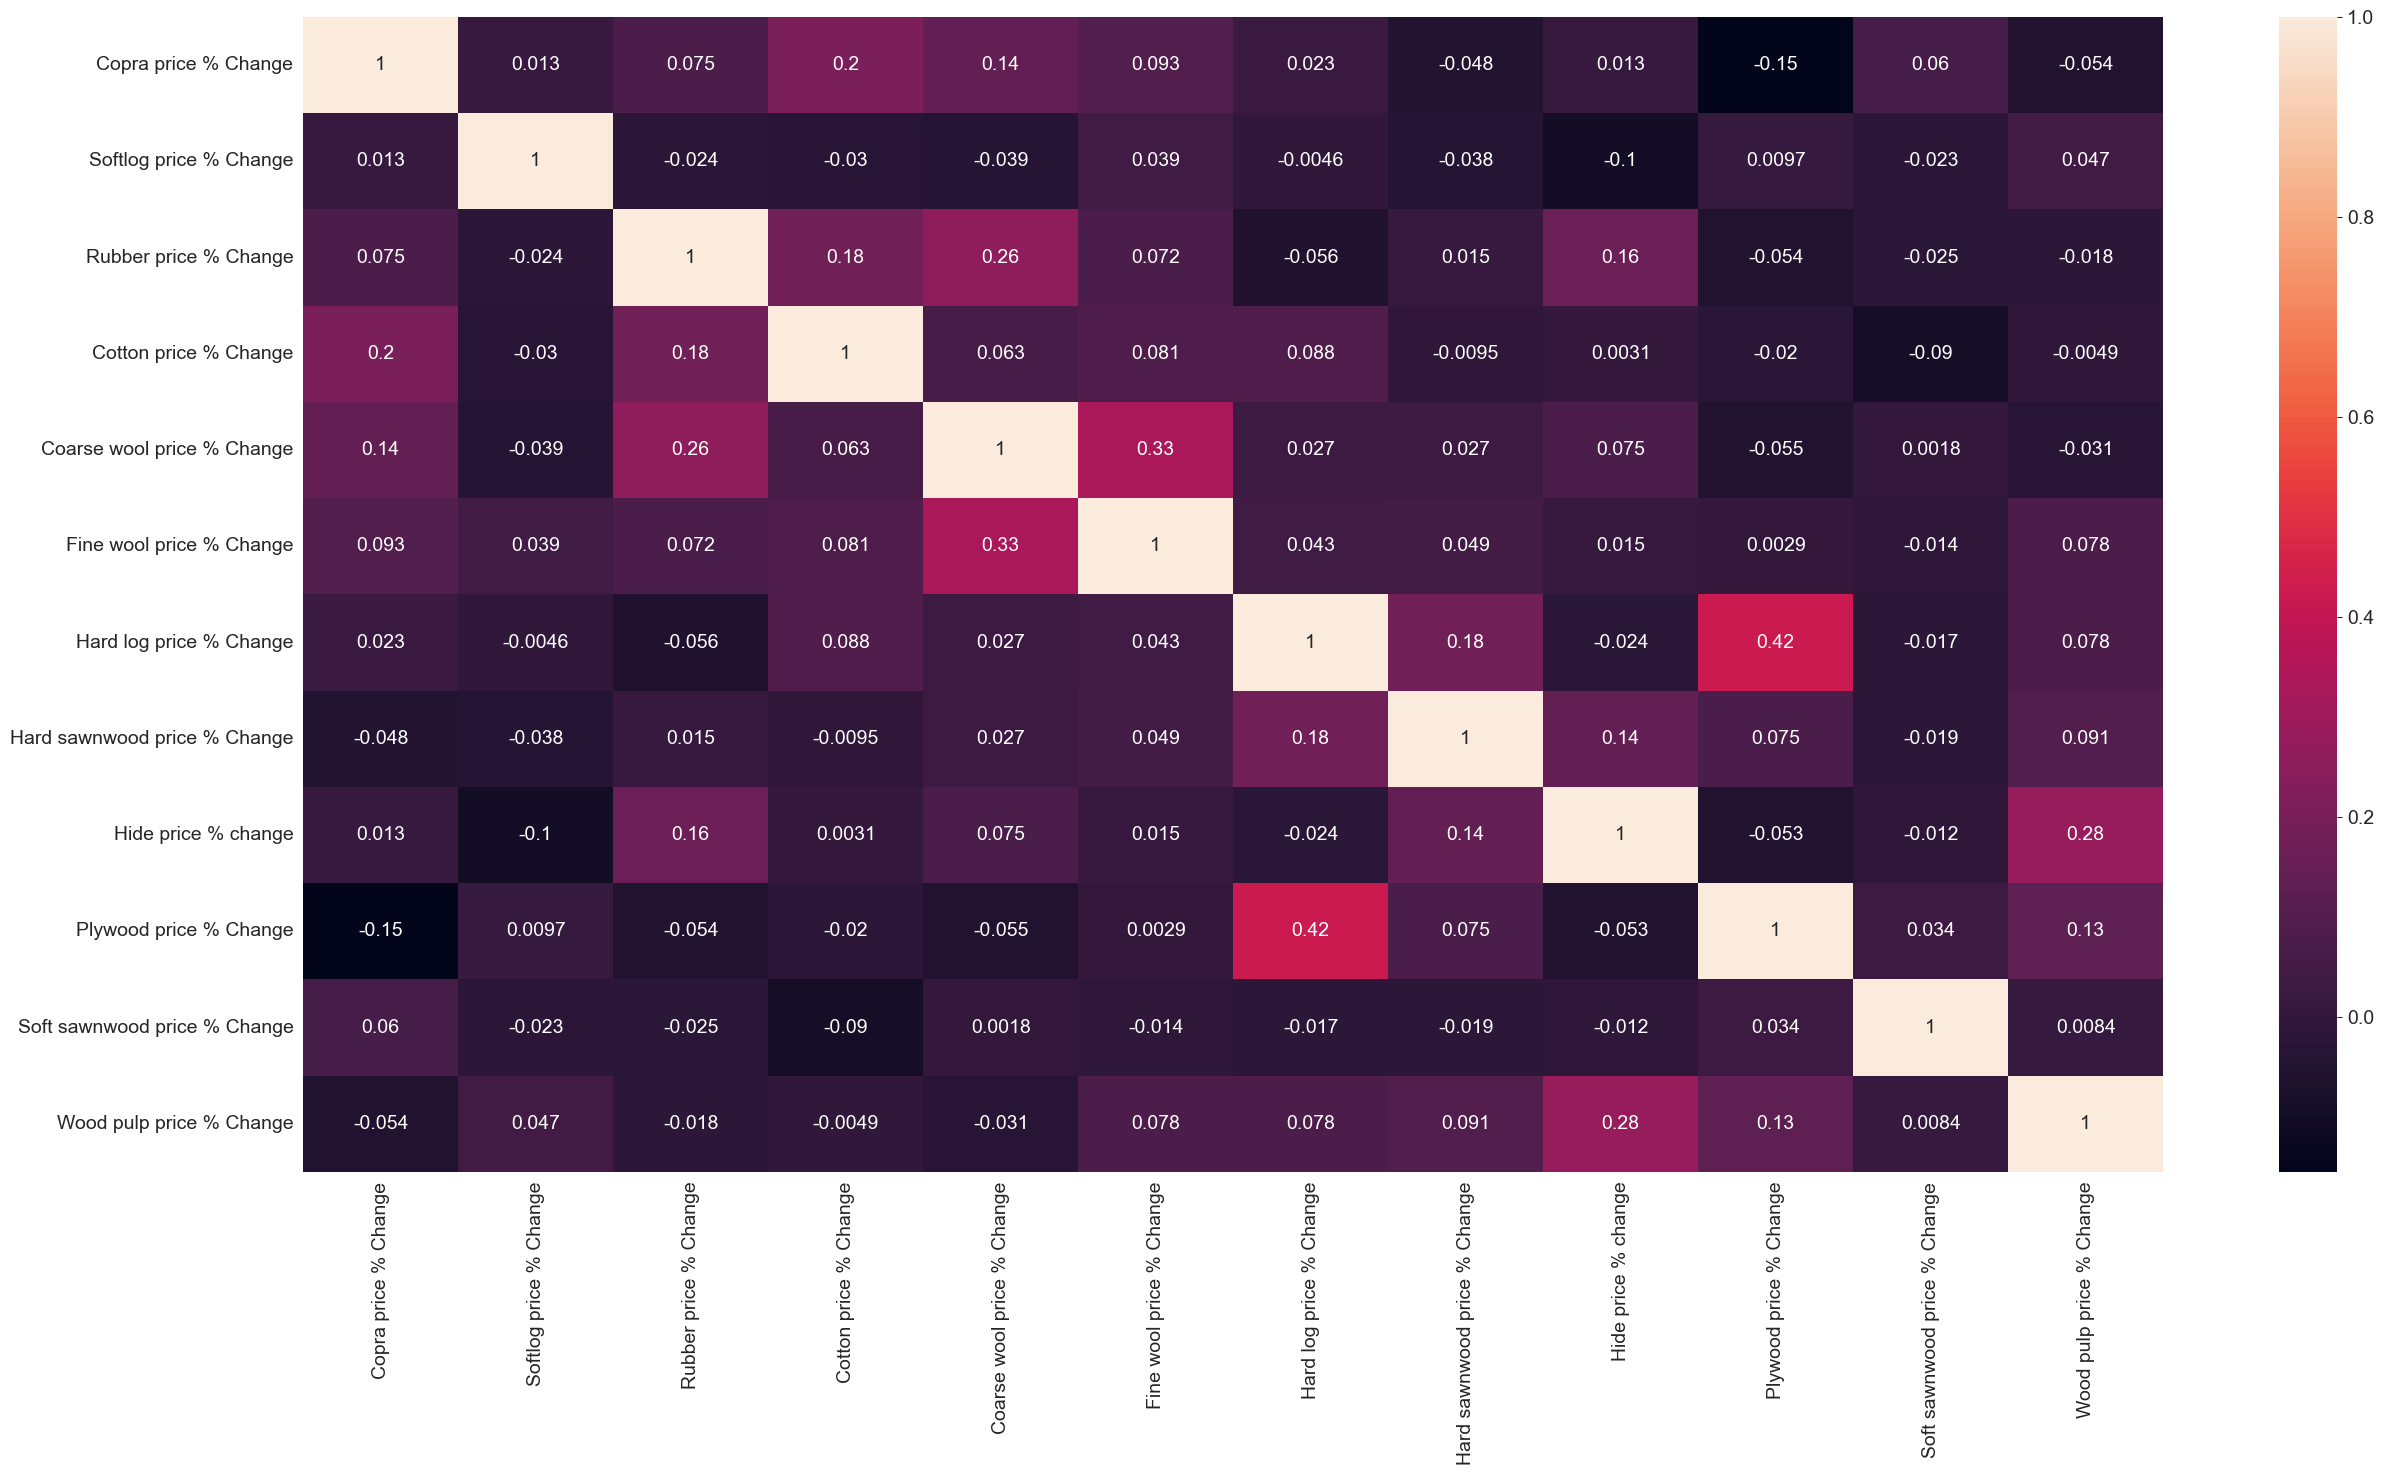

In [12]:
plt.figure(figsize=(30,15))
colum_change =['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
#Grafico procurando uma correlação por mudança dos valores.
corrMatrix = dataf[colum_change].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

~ A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas

- o valor negativo implica que duas variáveis ​​estão negativamente correlacionadas (um aumento, outro decréscimo)
- Zero implica nenhuma relação
- caso contrário, maior o valor maior a chance de relação. preços e seus gráficos de % de mudança

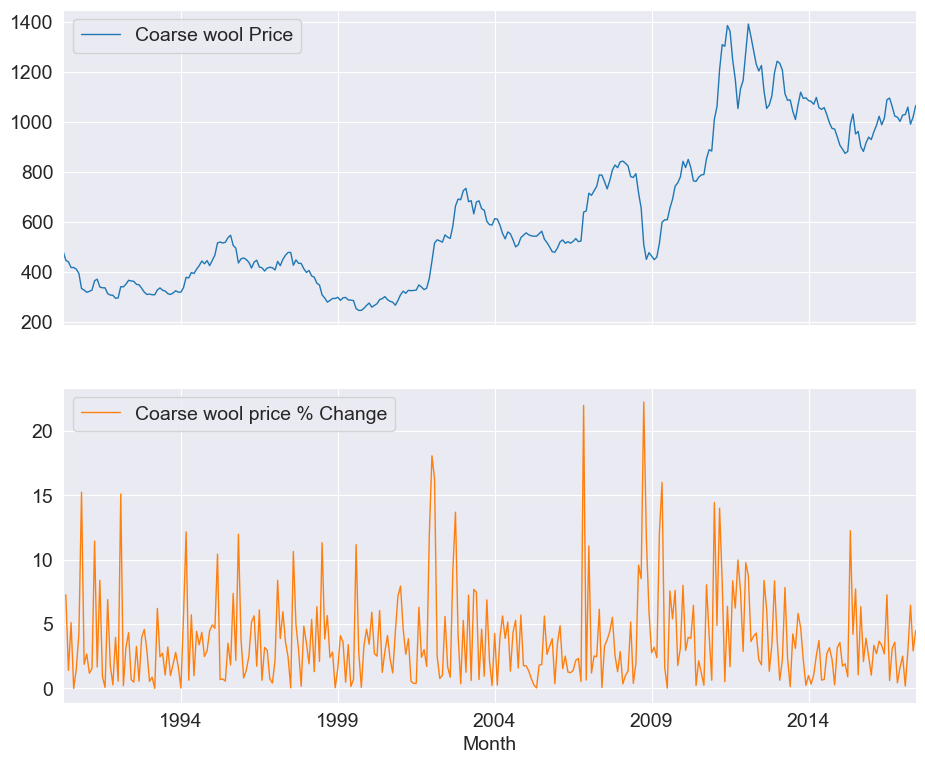

In [9]:
axes=dataf[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

In [ ]:
#Respondendo Perguntas de Negocios.

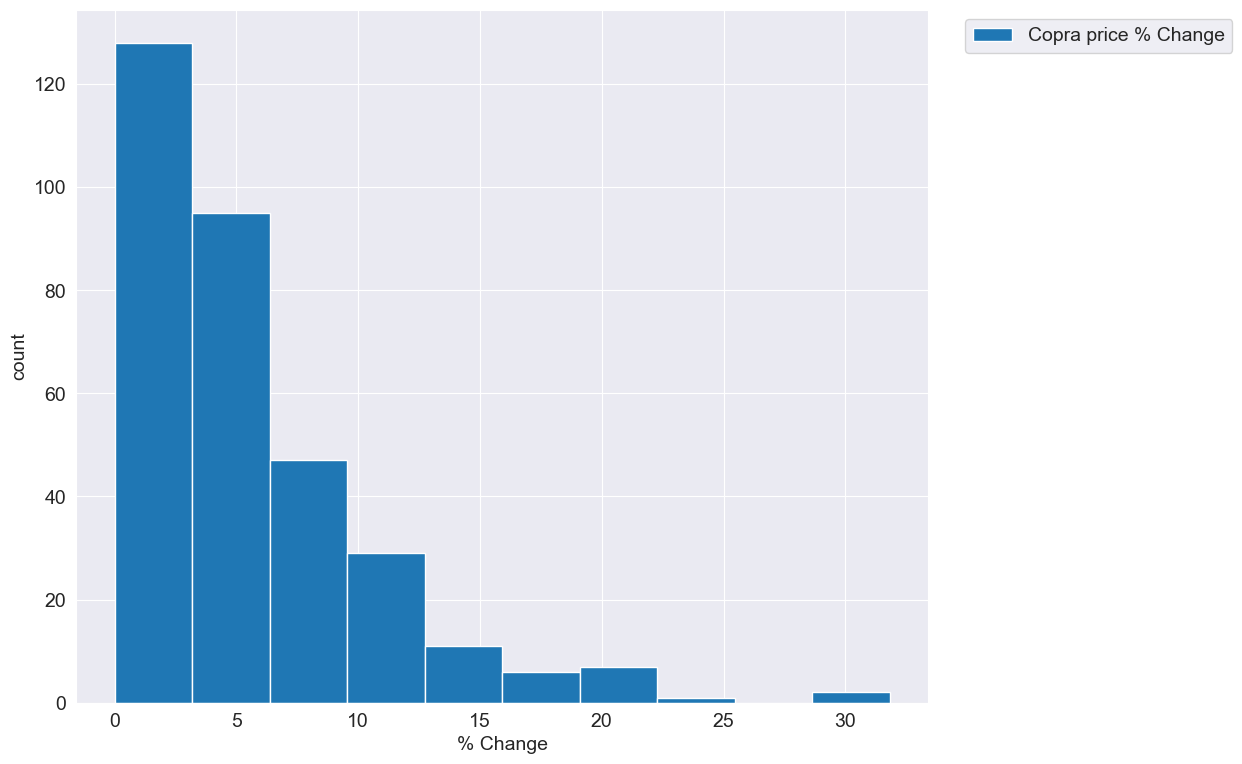

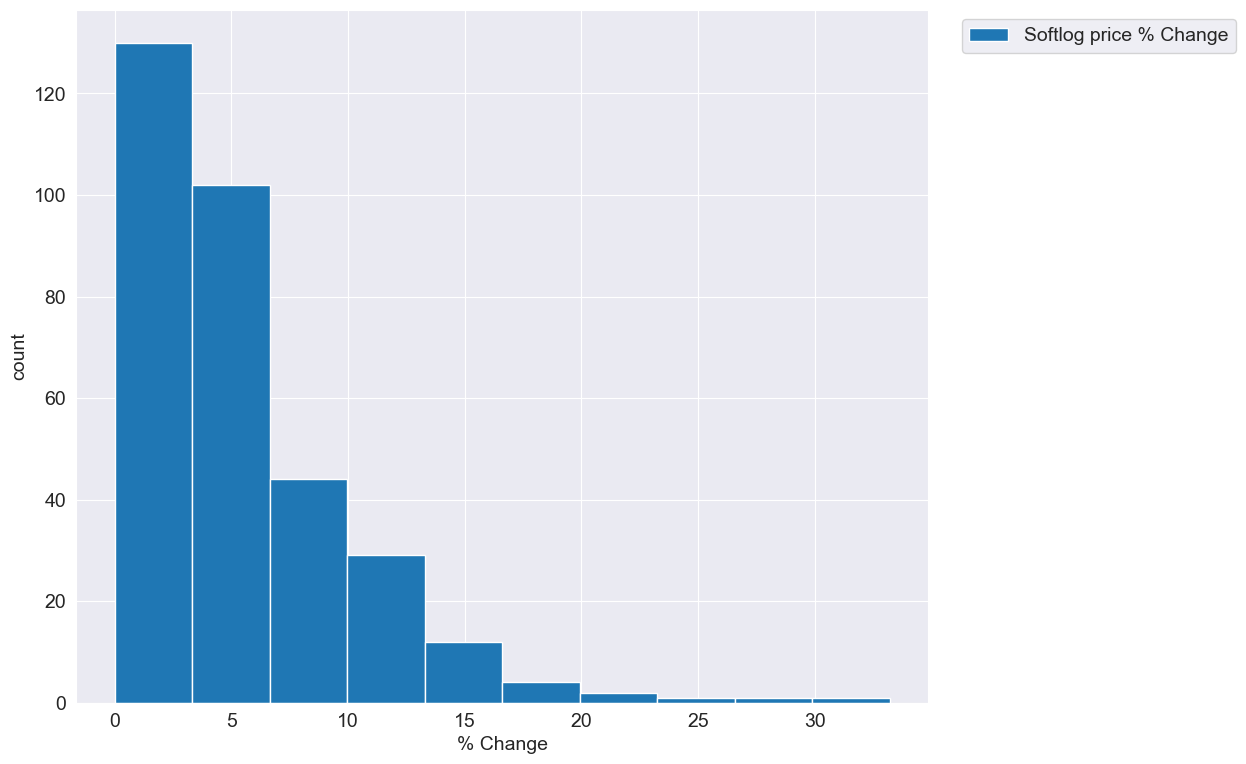

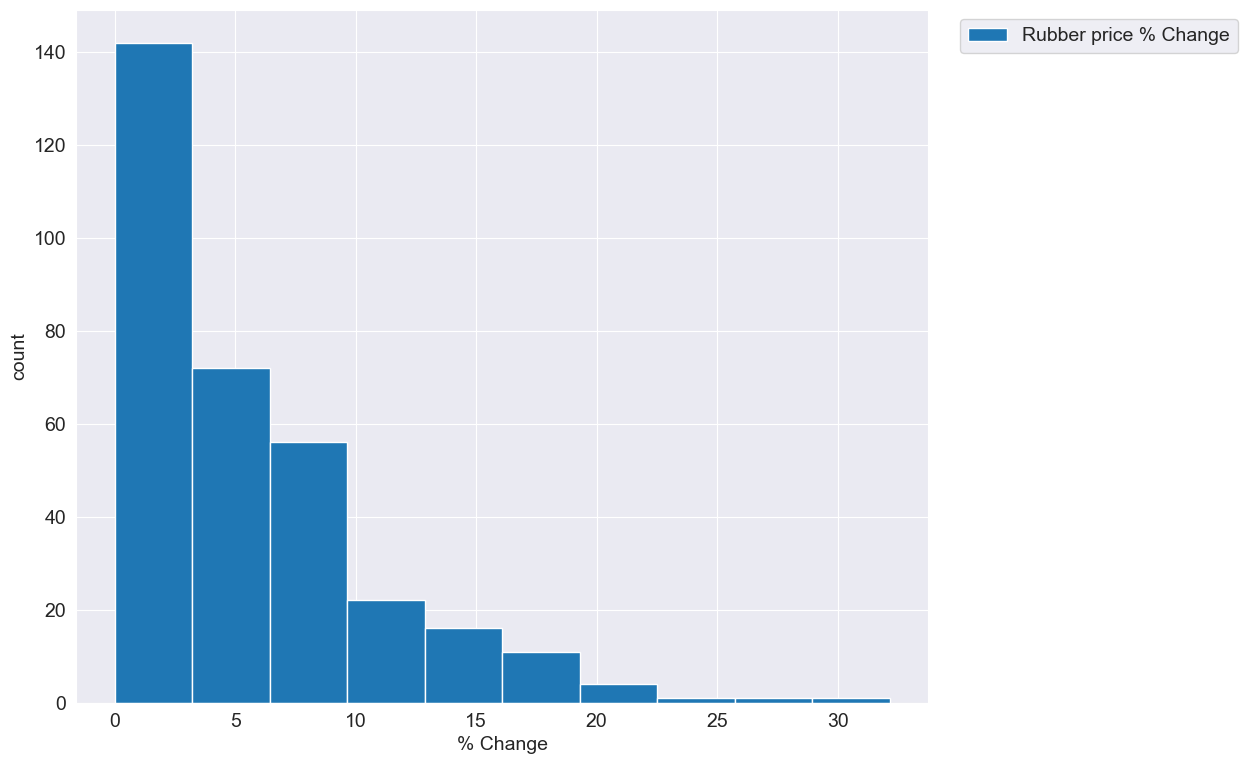

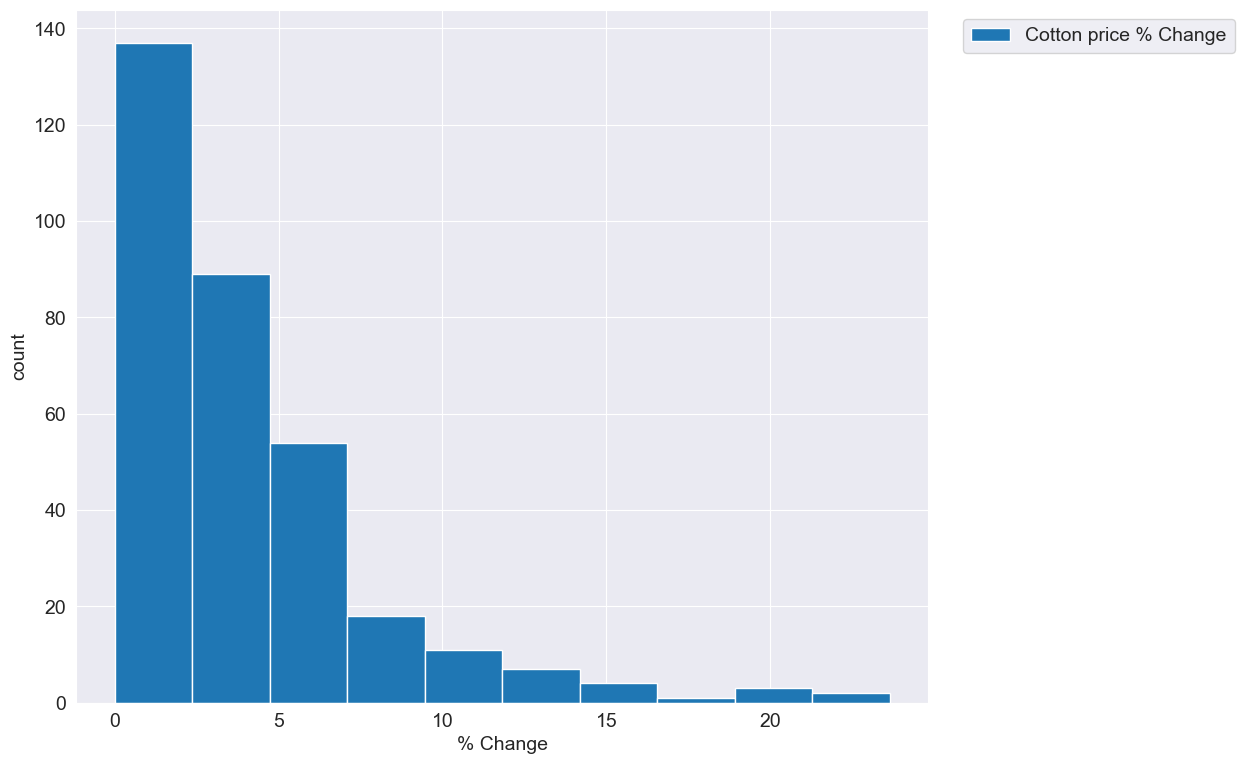

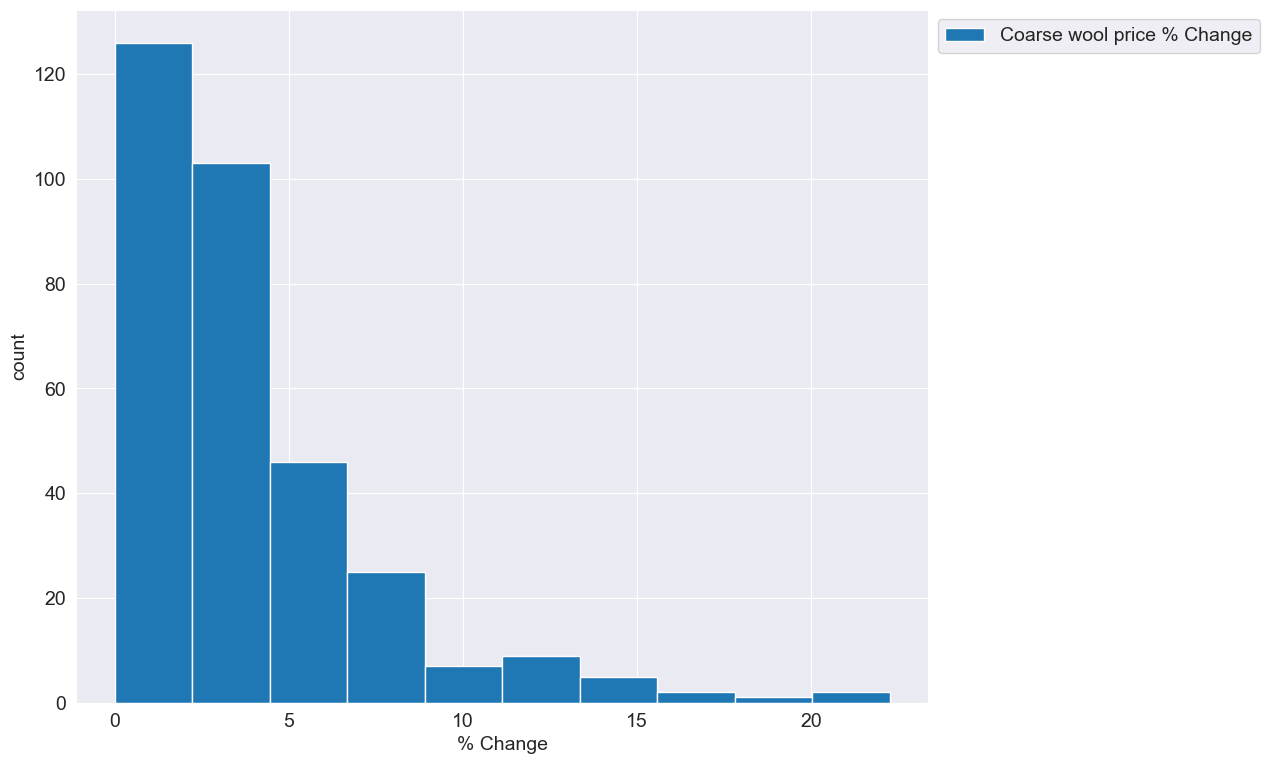

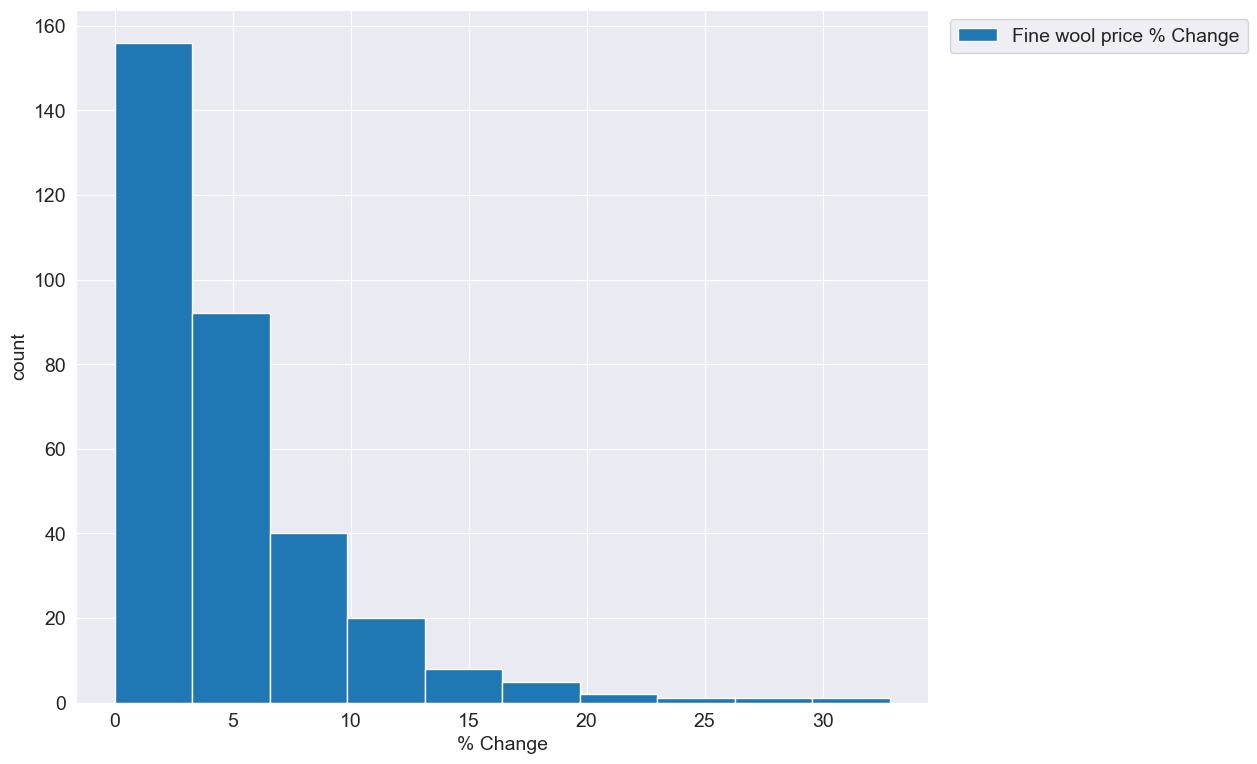

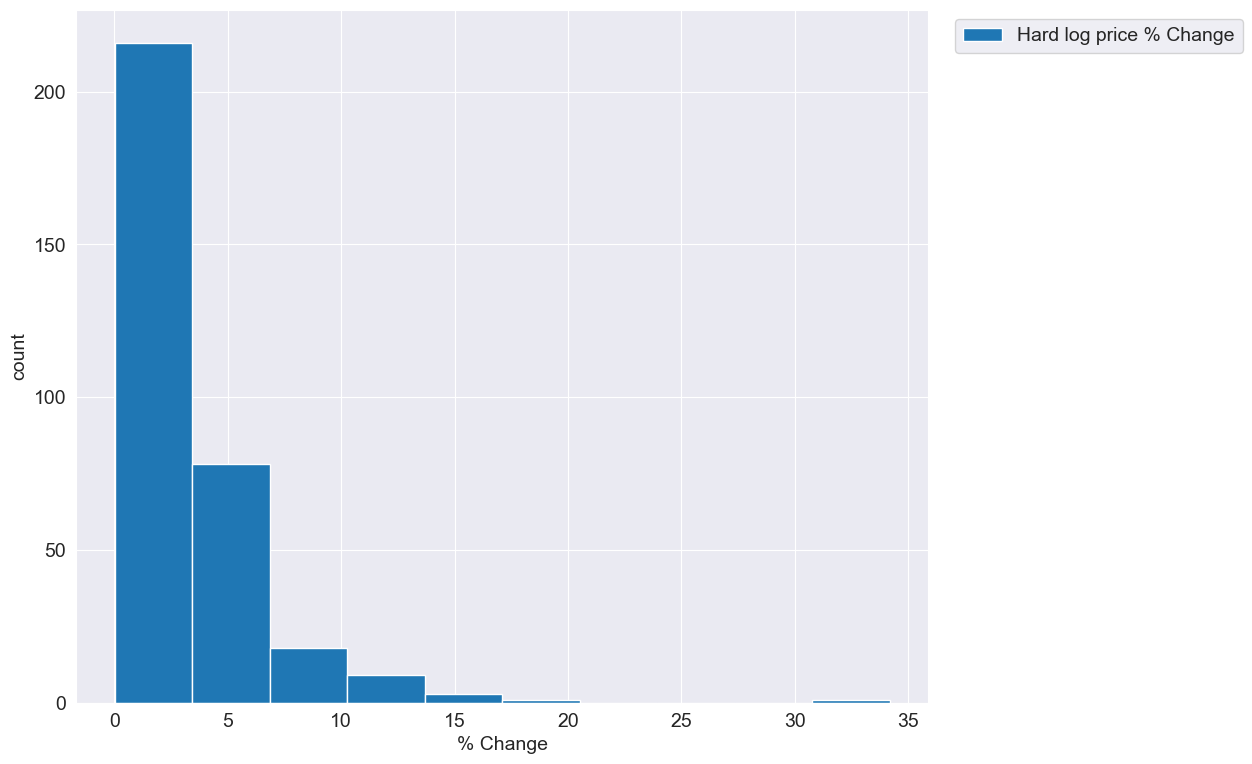

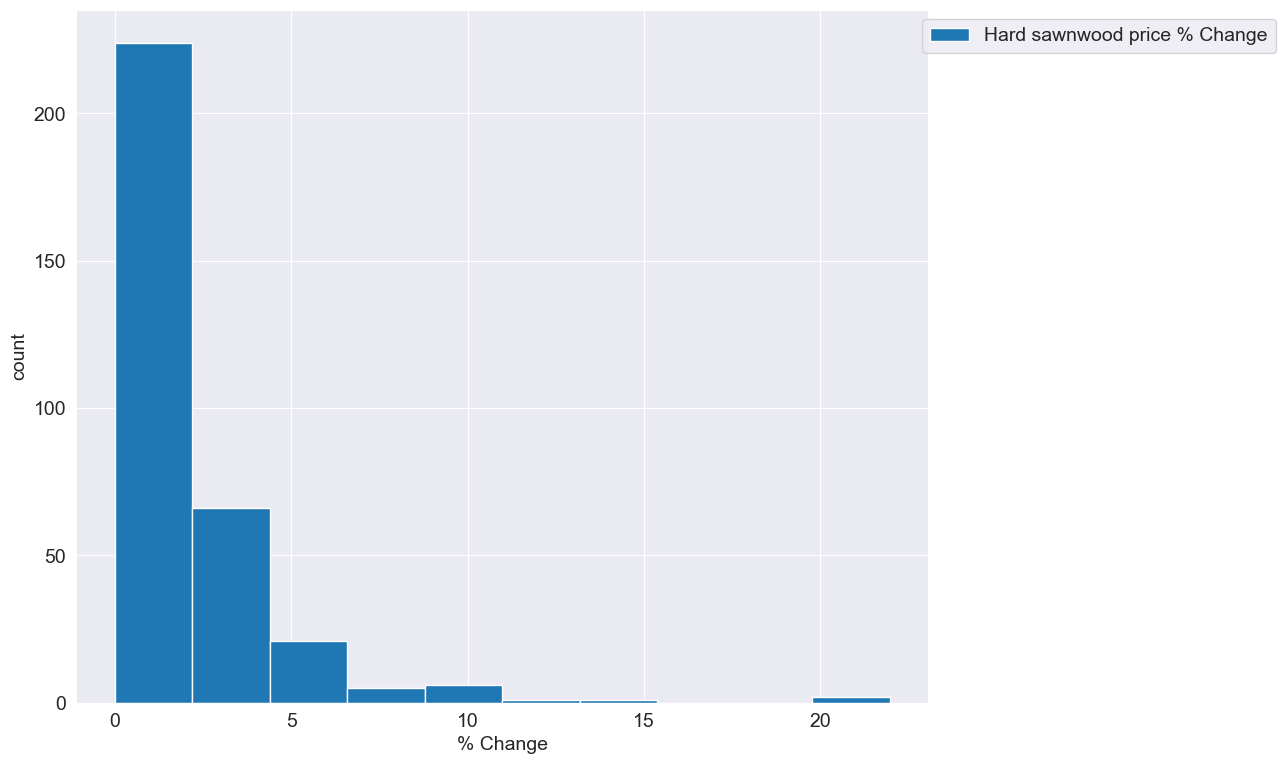

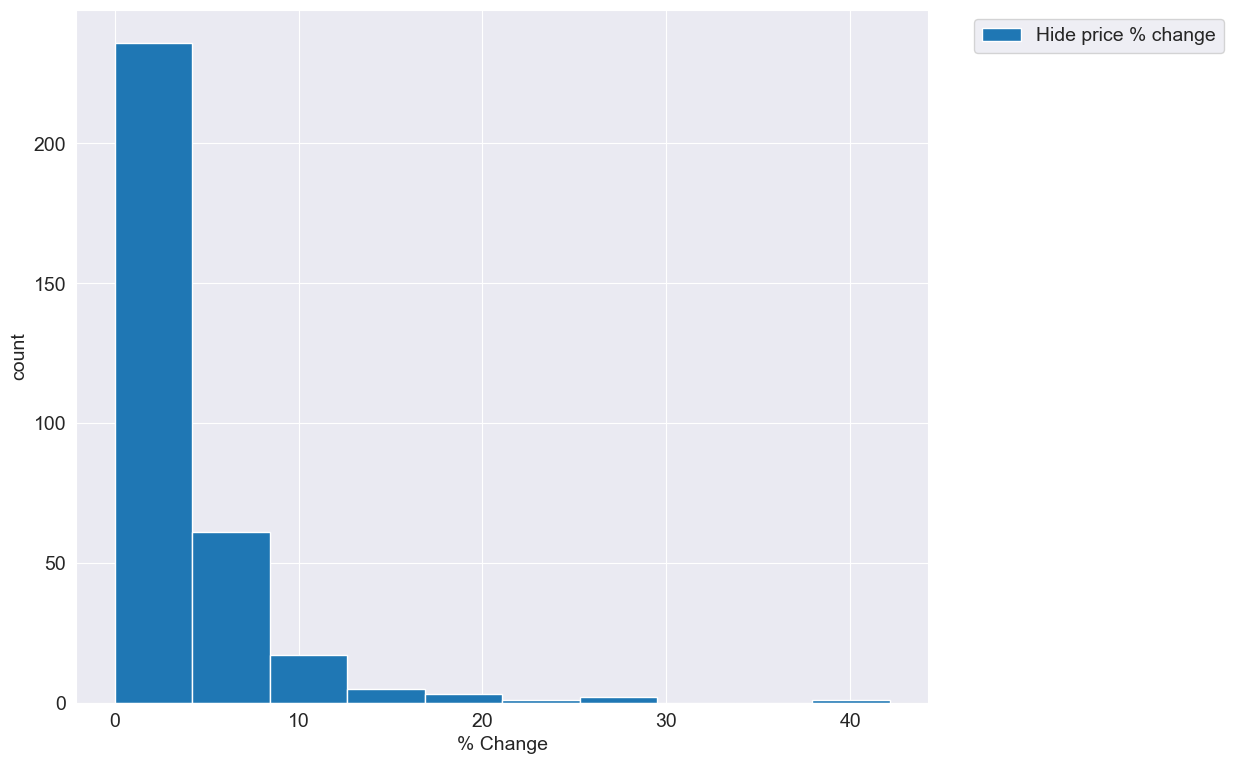

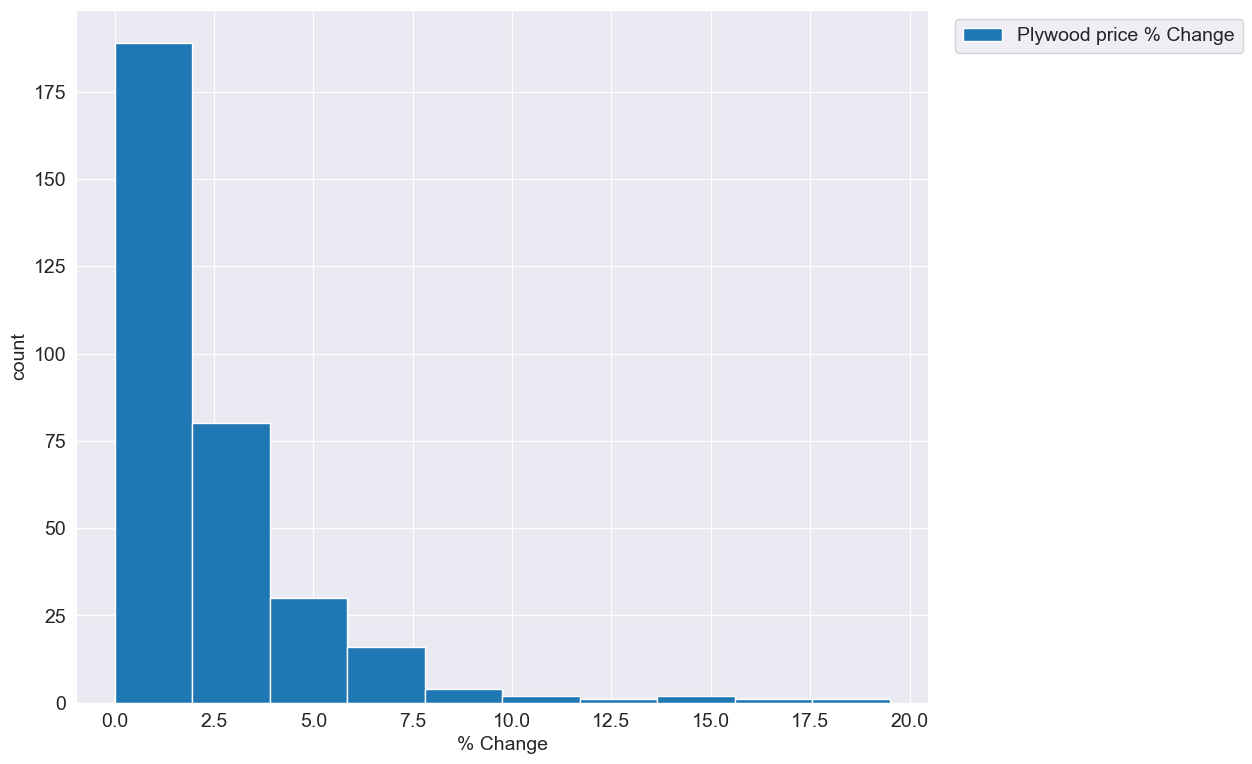

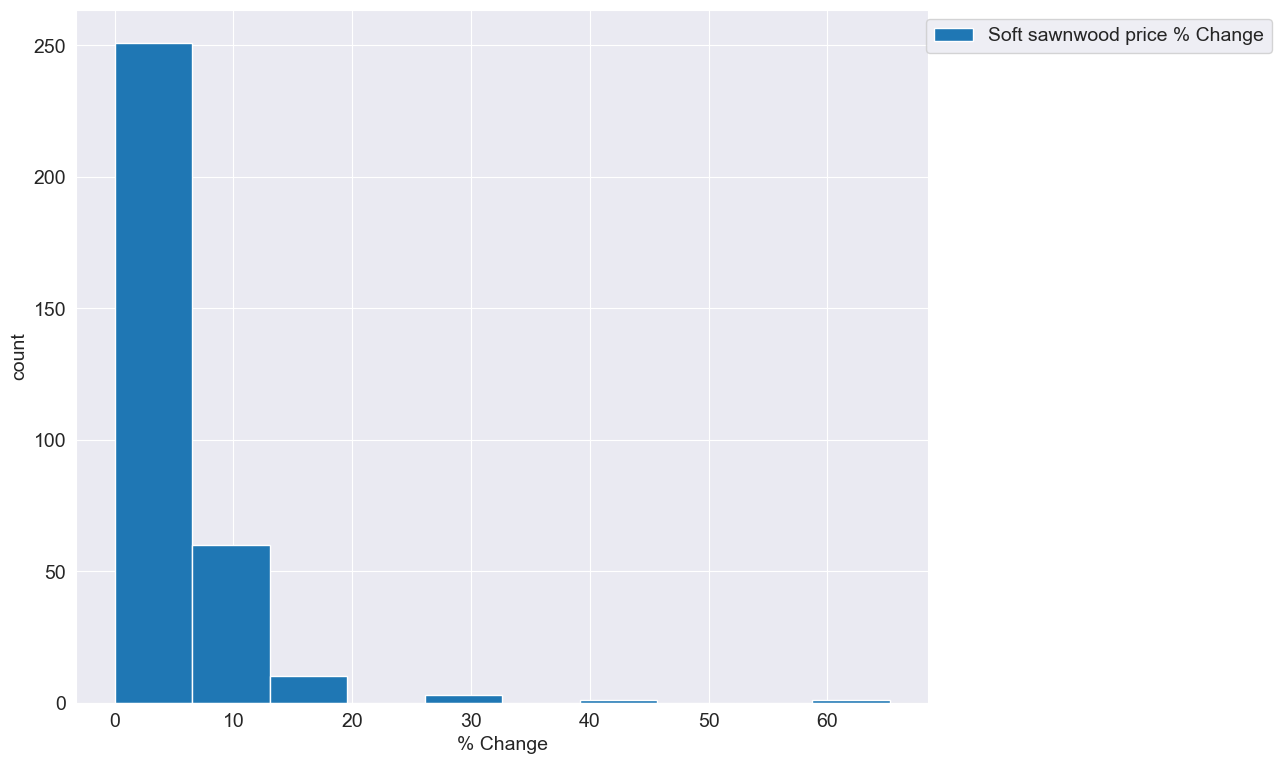

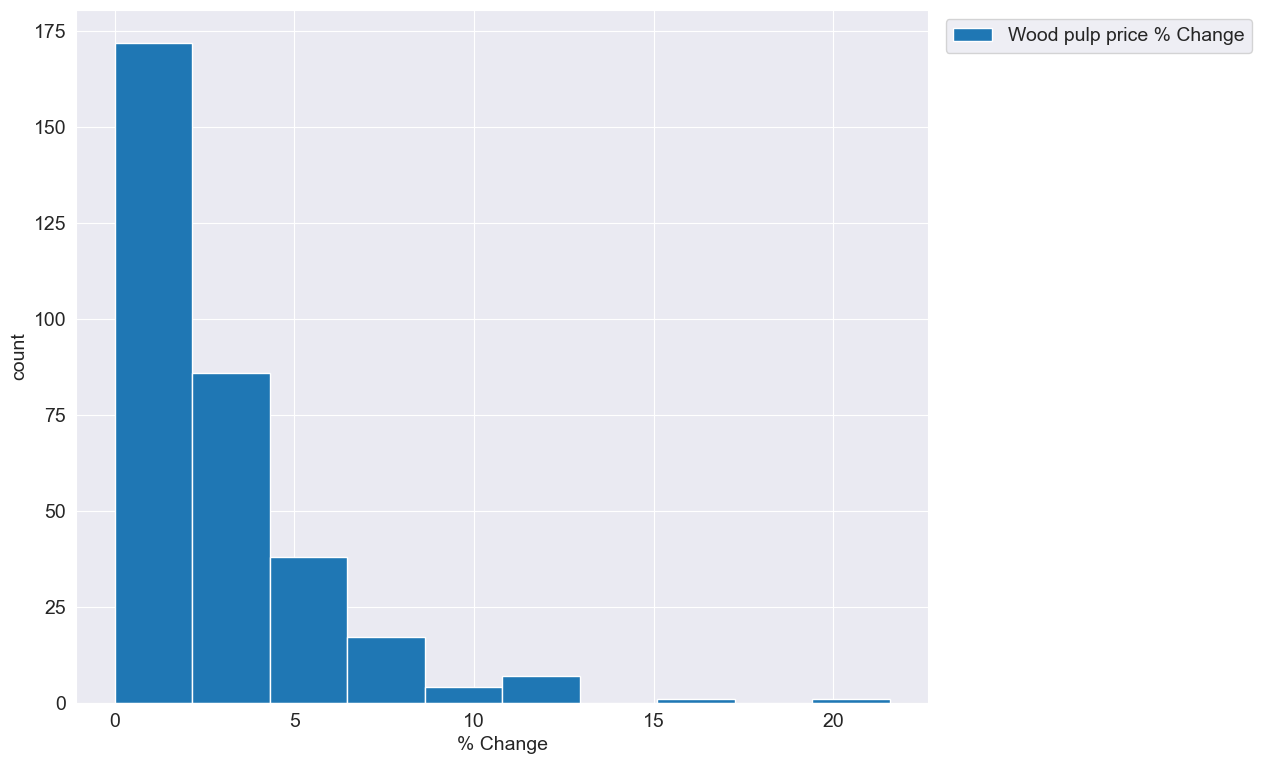

In [12]:
#-1- Qual é a variação dos preços de cada Materia prima?
colum_change =['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(colum_change)):
    plt.figure(figsize=(12,12))
    dataf[colum_change[i]].hist(figsize=(11, 9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(colum_change[i:],loc='upper center',bbox_to_anchor=(1.2,1))


Observamos que grande maioria das Materias primas tem uma mudança frecuente ideal inferior a  5%.

Text(0.5, 0.98, 'Raw-Materials price comparision')

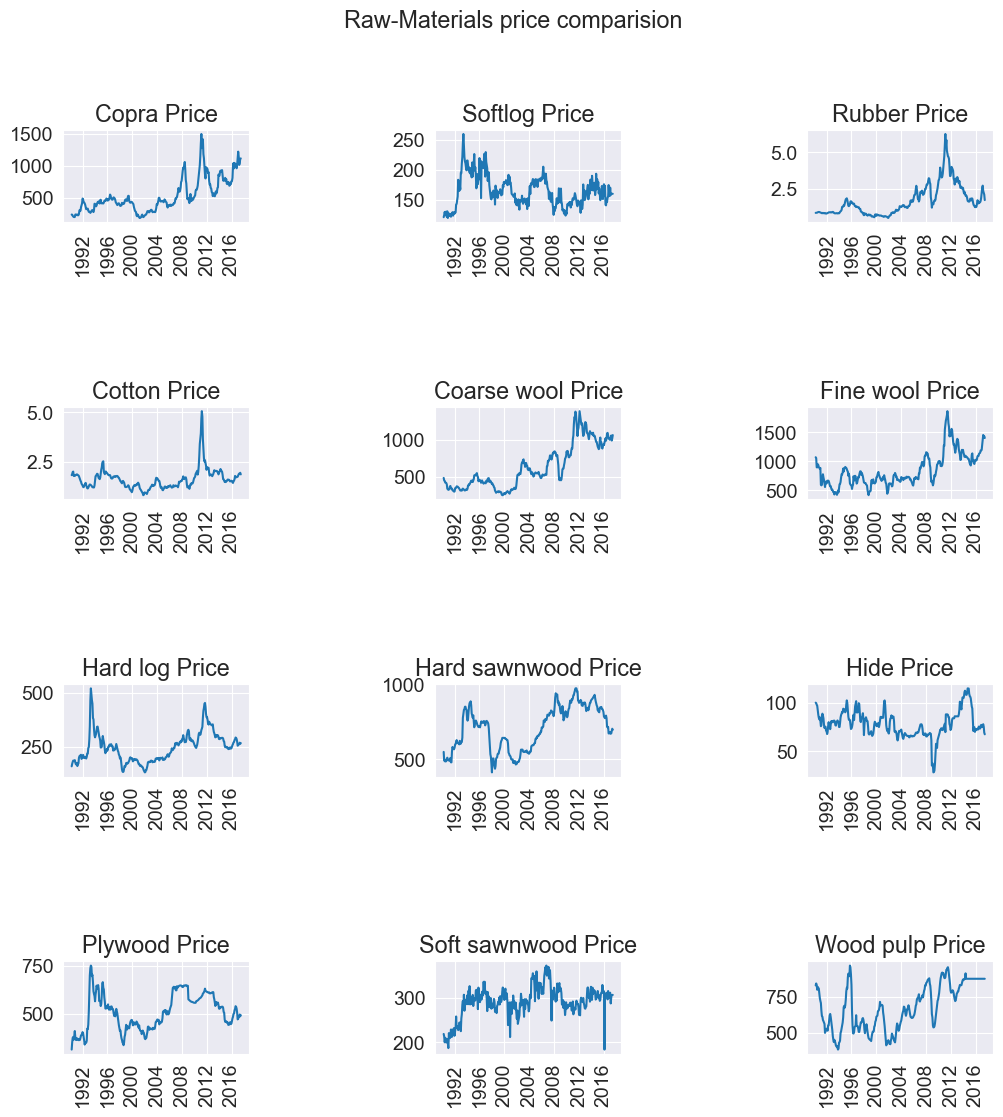

In [16]:
# -2- Qual materia prima tem o menor Preço ao longo dos anos?
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']
plt.figure(figsize=(12,12))
for i in range(len(materialslist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=2 ,wspace=1)
    plt.title(materialslist[i])
    plt.plot(dataf[materialslist[i]])
    plt.xticks(rotation=90)
plt.suptitle("Raw-Materials price comparision")

Podemos ver que o algodão e a borracha são de preços mais baixos vamos comparar preços para entender melhor qual é o mais baixo

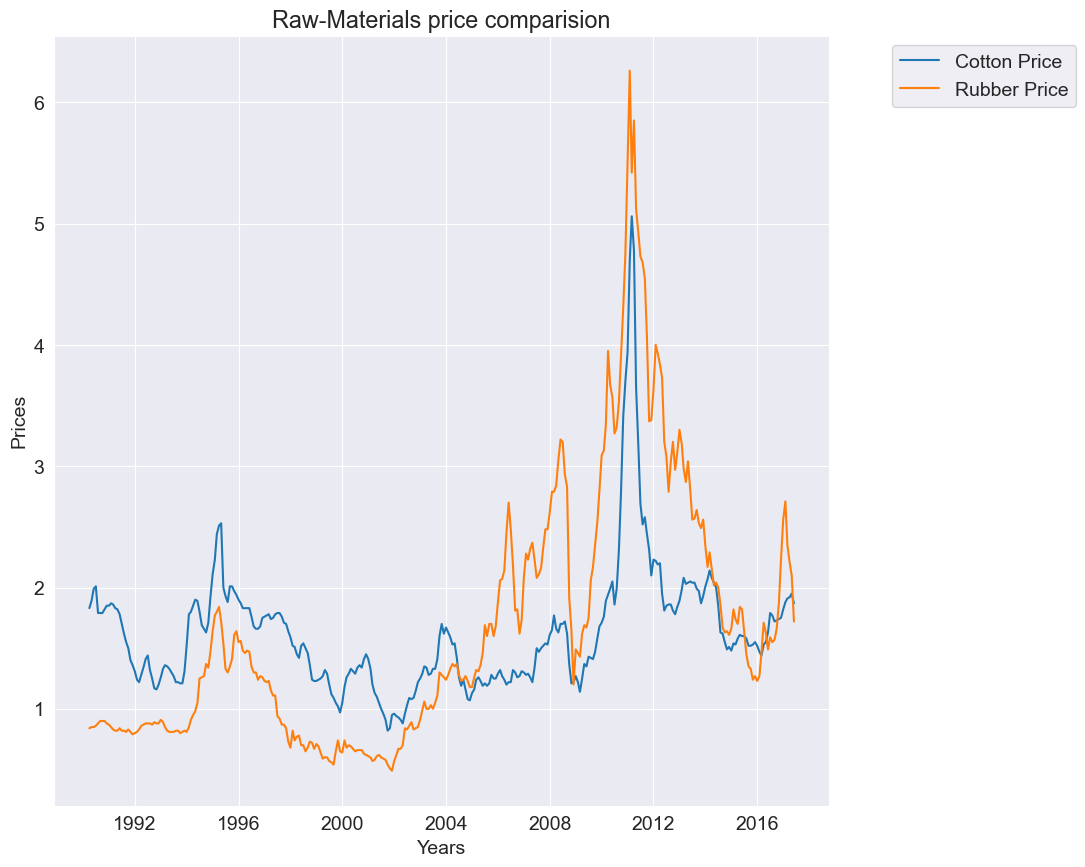

In [13]:
plt.figure(figsize=(10, 10))
plt.plot(dataf[['Cotton Price','Rubber Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price','Rubber Price'],loc='upper center',bbox_to_anchor=(1.2,1))

O Algodão é matéria-prima de menor preço nos últimos anos.

Tanto o algodão quanto a borracha são materiais de baixo preço

In [14]:
import random as random

In [ ]:
#Qual é a materia prima que tem a maior e a menor variação de % preço?

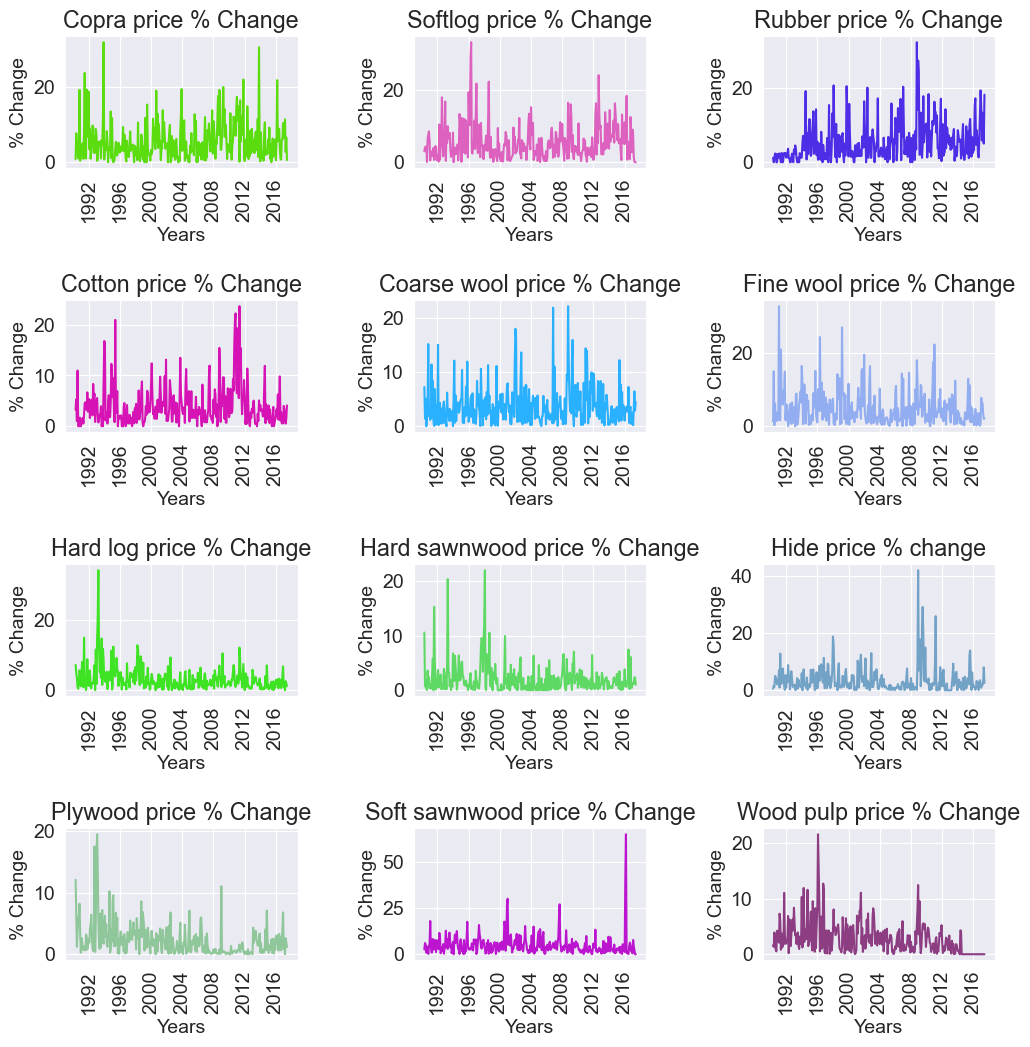

In [17]:
colum_change =['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
plt.figure(figsize=(12,12))
for i in range(len(colum_change)):
   
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.plot(dataf[colum_change[i]],c=color)
    plt.xticks(rotation=90)
    plt.title(colum_change[i])
    plt.xlabel('Years')
    plt.ylabel('% Change')

Podemos ver a maior % de mudança em mais de 60 para madeira serrada macia e a menor % de mudança é para madeira compensada em menos de 20

In [ ]:
#Quais materias primas com mudamças de preços drastica.

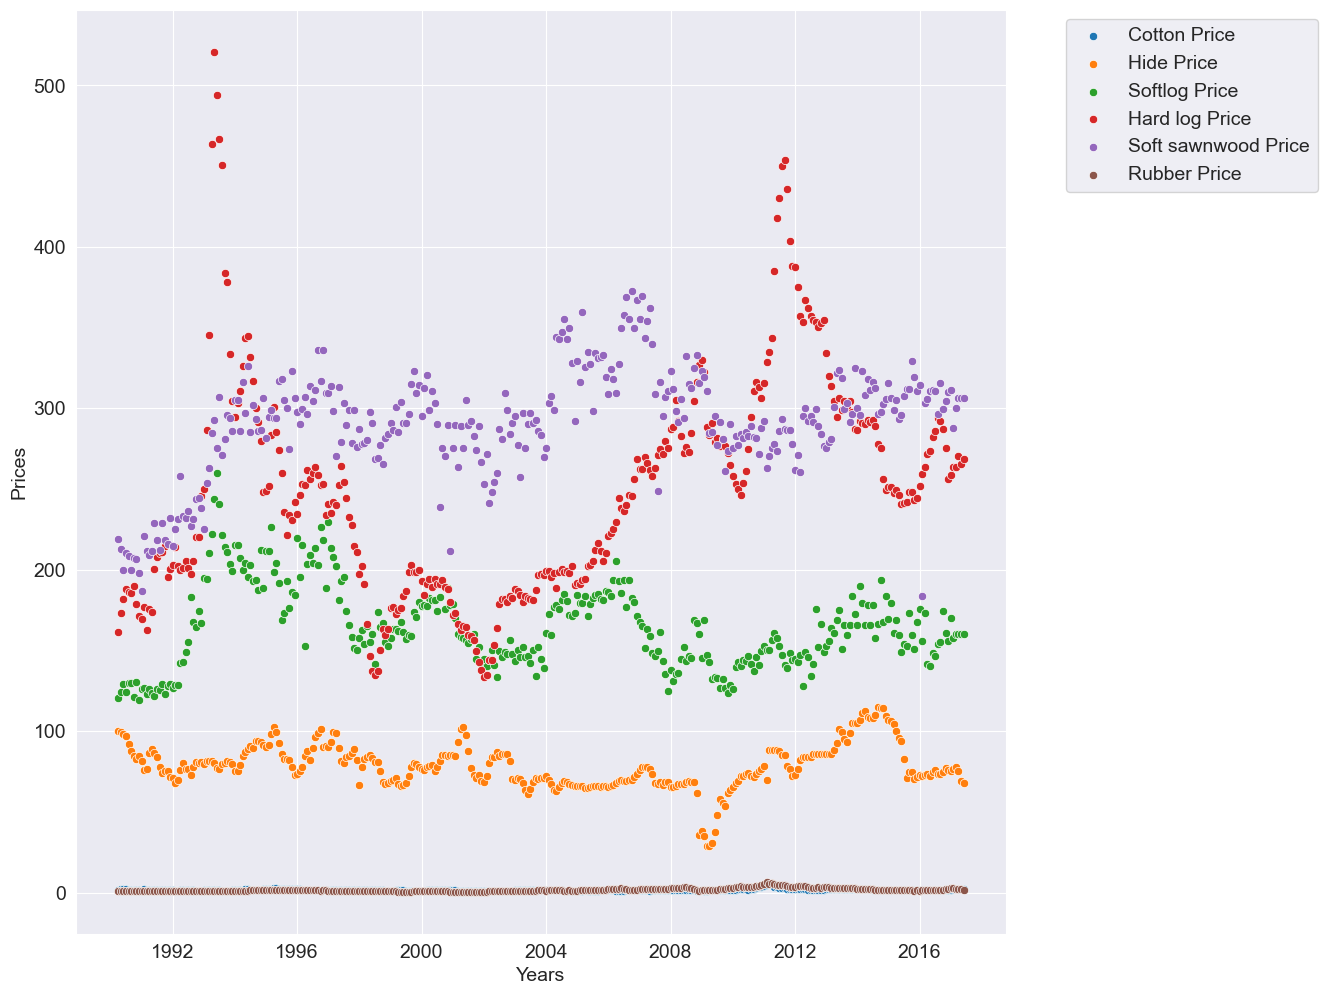

In [20]:
preços_baixos=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')
for i in range(len(preços_baixos)):
    sns.scatterplot(y=dataf[preços_baixos[i]],x=dataf.index);
    plt.legend(preços_baixos,loc='upper center',bbox_to_anchor=(1.2,1))

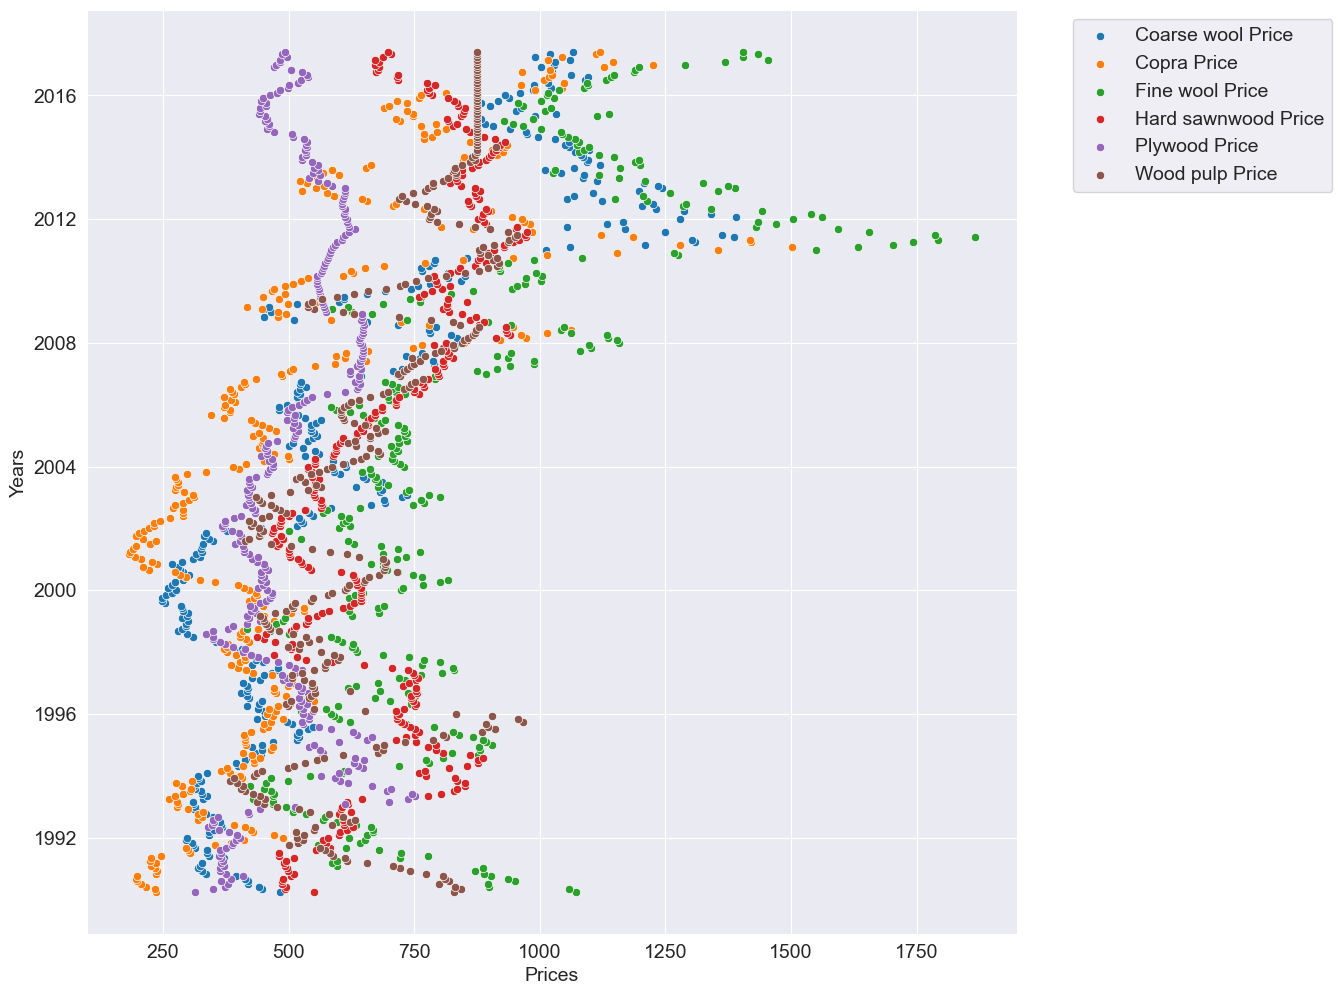

In [21]:
preços_altos =['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(preços_altos)):
    sns.scatterplot(x=dataf[preços_altos[i]],y=dataf.index);
    plt.legend(preços_altos,loc='upper center',bbox_to_anchor=(1.2,1))

A mudança de preço é drástica para o preço de tora dura entre materiais de baixa faixa de preço e entre materiais de alto preço, são os preços de lã fina.

## Inferências e Conclusão ##
* Descobrimos as matérias-primas de alta e baixa gama de acordo com seus preços.
* alta e baixa % de variação dos materiais
* Pudemos identificar a variação de preços ao longo dos anos.
* Correlação entre eles usando um mapa de calor

## Trabalho futuro ##
*  Além disso, poderíamos descobrir a relação entre as matérias-primas em detalhes e, com a ajuda do conhecimento do negócio, poderíamos descobrir as matérias-primas mais próximas.
*  Também pudemos prever os preços das matérias-primas analisando os anos anteriores

* Prevendo a variação de preços e com base nisso, poderíamos planejar nosso uso de matéria-prima com antecedência para o próximo ano e descobrir quaisquer materiais alternativos.